# Introduction

This project investigates the relationship between a country's economic output (GDP) and the life expectancy of its citizens. 

The primary goal is to analyze trends, correlations, and patterns in the data for six countries.

The analysis will focus on answering these key questions:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of life expectancy in these nations?

Additionally, creative components will be included, such as:

+ Analyzing growth rates of GDP and life expectancy.
+ Ranking nations by improvement in GDP and life expectancy.
+ Calculating GDP efficiency (GDP per year of life expectancy).
+ Comparing GDP and life expectancy to explore economic inequality (adapted from GDP per capita).
+ Identifying historical events that may have impacted GDP and life expectancy trends.

**Data sources**

- GDP data from the World Bank: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life Expectancy data from the World Health Organization: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import Python Modules

Before diving into the analysis, import the necessary Python modules. These modules will allow us to clean, analyze, and visualize the data effectively. Also, ensuring that visualizations are displayed inline.

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

## Loading the Data

The dataset contains four columns:
- `Country`: The country for which the data is recorded.
- `Year`: The year of the observation.
- `Life expectancy at birth (years)`: The average life expectancy in years.
- `GDP`: The Gross Domestic Product in U.S. dollars.

In [6]:
# Load the dataset into a Pandas DataFrame and display the first few rows to get an initial view of the data.
data = pd.read_csv("all_data.csv")
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Another check of the shape of `df` is performed. It seems that there are 96 observations or rows and 4 columns. 

In [8]:
data.shape

(96, 4)

## Explore the Data (EDA)

Before diving into specific analyses, explore the dataset to understand its structure and identify any cleaning requirements.
Check for missing values, outliers, or inconsistencies in the data.

In [11]:
data.info()
data.describe()

# Check for missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [12]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


The next step is to find out which years are represented in the data, and they are 2000-2015.

In [14]:
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


# Analyze the distribution of GDP and Life Expectancy

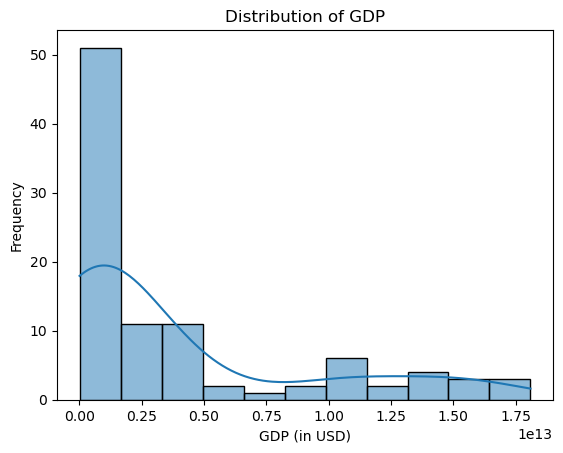

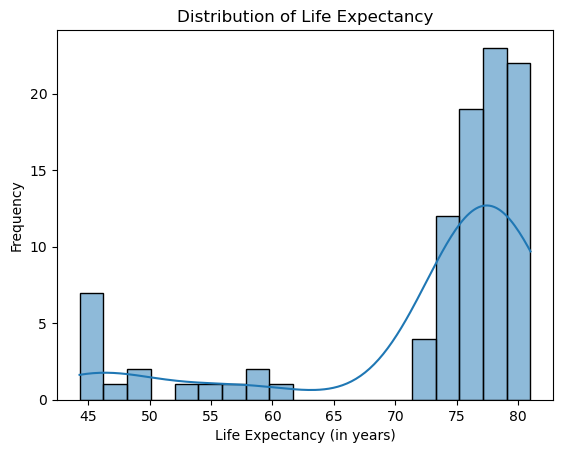

In [16]:
sns.histplot(data['GDP'], kde=True)
plt.title('Distribution of GDP')
plt.xlabel('GDP (in USD)')
plt.ylabel('Frequency')
plt.show()

sns.histplot(data['Life expectancy at birth (years)'], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (in years)')
plt.ylabel('Frequency')
plt.show()

# Analyze Trends Over Time

### Has life expectancy increased over time in the six nations?
Plot line charts showing life expectancy trends for each country over time.

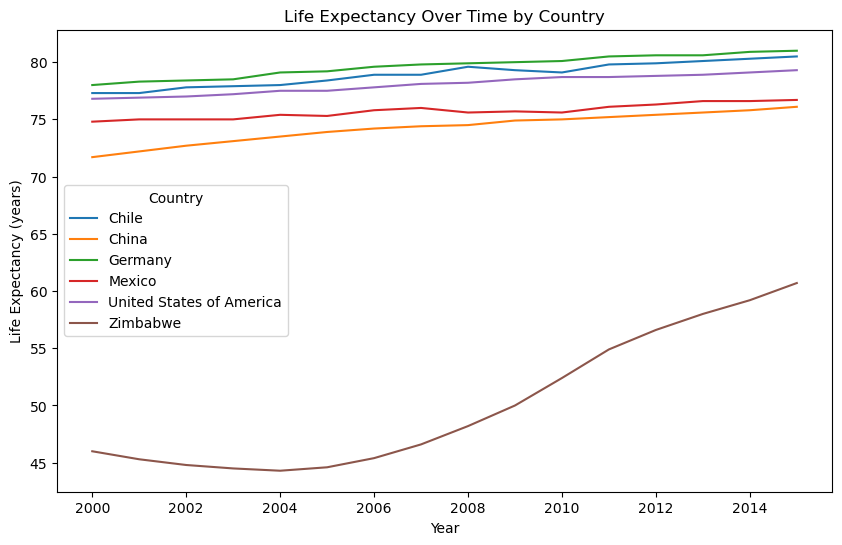

In [19]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='Life expectancy at birth (years)', hue='Country')
plt.title('Life Expectancy Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend(title='Country')
plt.show()

### Has GDP increased over time in the six nations?
Plot line charts showing GDP trends for each country over time.

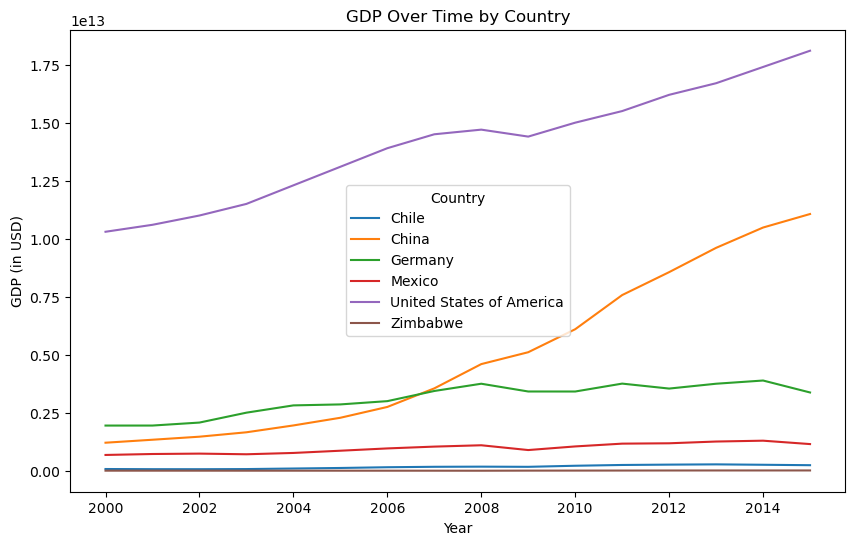

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Year', y='GDP', hue='Country')
plt.title('GDP Over Time by Country')
plt.xlabel('Year')
plt.ylabel('GDP (in USD)')
plt.legend(title='Country')
plt.show()

### Highlight the country with the greatest GDP growth
Determine which country has shown the greatest GDP growth over time.

In [23]:
gdp_growth_by_country = data.groupby('Country')['GDP'].apply(lambda x: x.iloc[-1] - x.iloc[0])
print("GDP Growth by Country:")
print(gdp_growth_by_country)

GDP Growth by Country:
Country
Chile                       1.646571e+11
China                       9.853350e+12
Germany                     1.425660e+12
Mexico                      4.686120e+11
United States of America    7.800000e+12
Zimbabwe                    9.614710e+09
Name: GDP, dtype: float64


# Correlation Between GDP and Life Expectancy

### Analyze the relationship between GDP and life expectancy

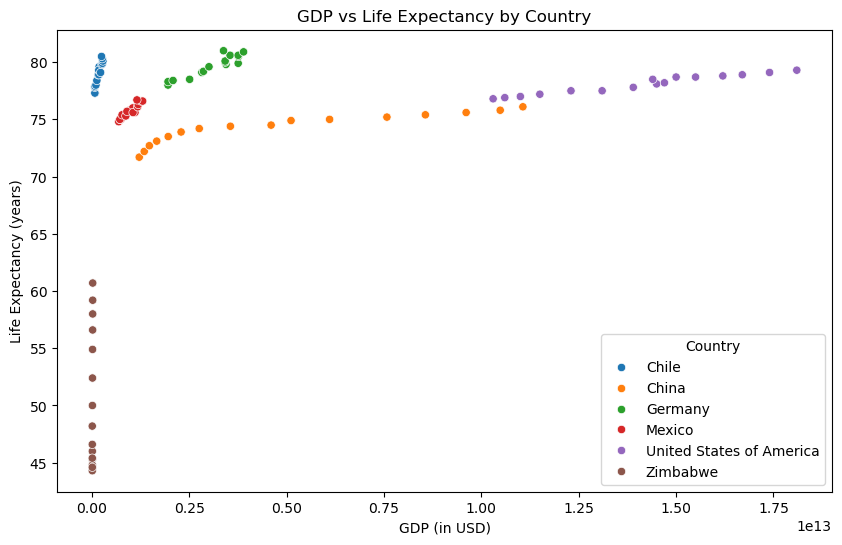

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='GDP', y='Life expectancy at birth (years)', hue='Country')
plt.title('GDP vs Life Expectancy by Country')
plt.xlabel('GDP (in USD)')
plt.ylabel('Life Expectancy (years)')
plt.legend(title='Country')
plt.show()

### Compute correlation coefficients for each country

In [28]:
correlations = data.groupby('Country').apply(lambda x: x[['GDP', 'Life expectancy at birth (years)']].corr().iloc[0, 1])
correlations.name = 'Correlation Coefficient'
print(correlations)

Country
Chile                       0.949877
China                       0.908526
Germany                     0.932699
Mexico                      0.932238
United States of America    0.981709
Zimbabwe                    0.966200
Name: Correlation Coefficient, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_13324\40710597.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = data.groupby('Country').apply(lambda x: x[['GDP', 'Life expectancy at birth (years)']].corr().iloc[0, 1])


# Summary Statistics

### Calculate the average life expectancy for each nation.

In [31]:
average_life_expectancy = data.groupby('Country')['Life expectancy at birth (years)'].mean()
print("Average Life Expectancy by Country:")
print(average_life_expectancy)

Average Life Expectancy by Country:
Country
Chile                       78.94375
China                       74.26250
Germany                     79.65625
Mexico                      75.71875
United States of America    78.06250
Zimbabwe                    50.09375
Name: Life expectancy at birth (years), dtype: float64


### Analyze the distribution of life expectancy using boxplots.

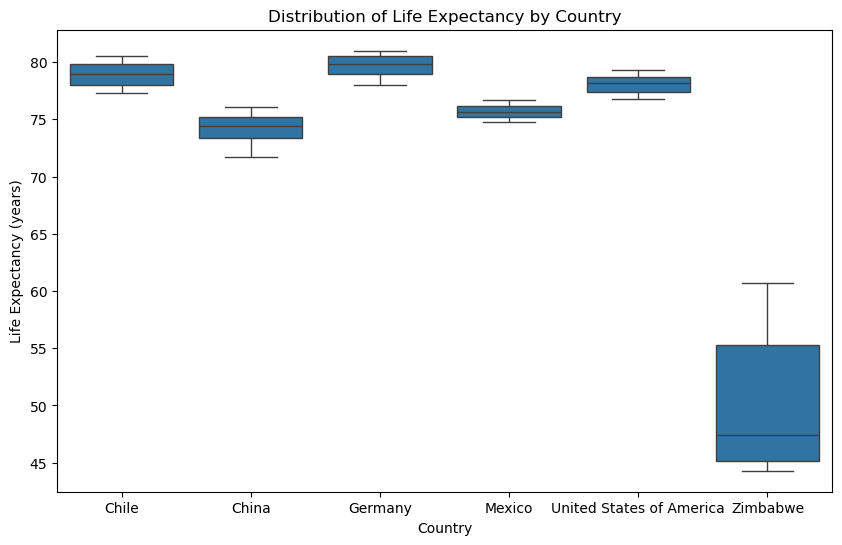

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Country', y='Life expectancy at birth (years)')
plt.title('Distribution of Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.show()

### Check skewness of life expectancy distribution

In [35]:
life_expectancy_skewness = data['Life expectancy at birth (years)'].skew()
print(f"Skewness of Life Expectancy Distribution: {life_expectancy_skewness}")

Skewness of Life Expectancy Distribution: -1.8449349568541278


### Add Violin Plot for Life Expectancy by Country

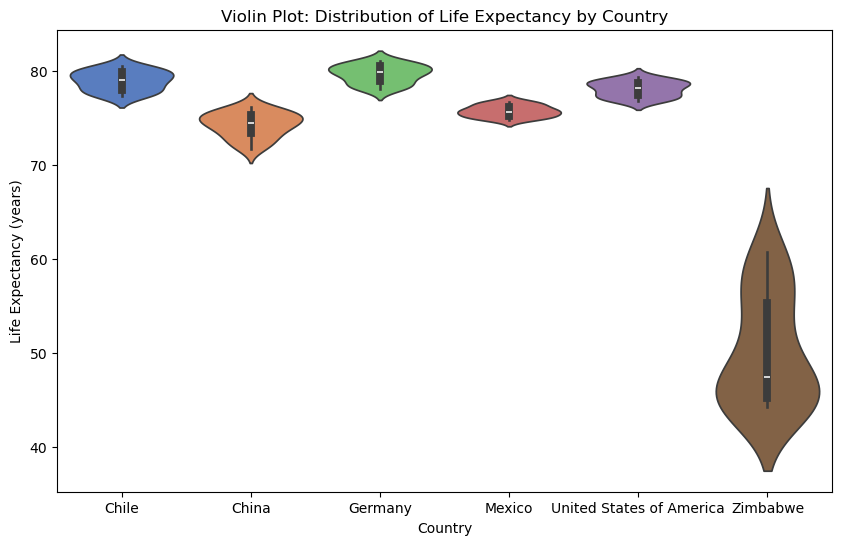

In [37]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Country', y='Life expectancy at birth (years)', palette='muted', hue = 'Country', legend=False)
plt.title('Violin Plot: Distribution of Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.show()

# Add Violin Plot for Life Expectancy by Country

Swarm plots are useful because they complement box and violin plots.

They show dot density around the values as well as distribution through area/shape.

### Standalone Swarm Plot

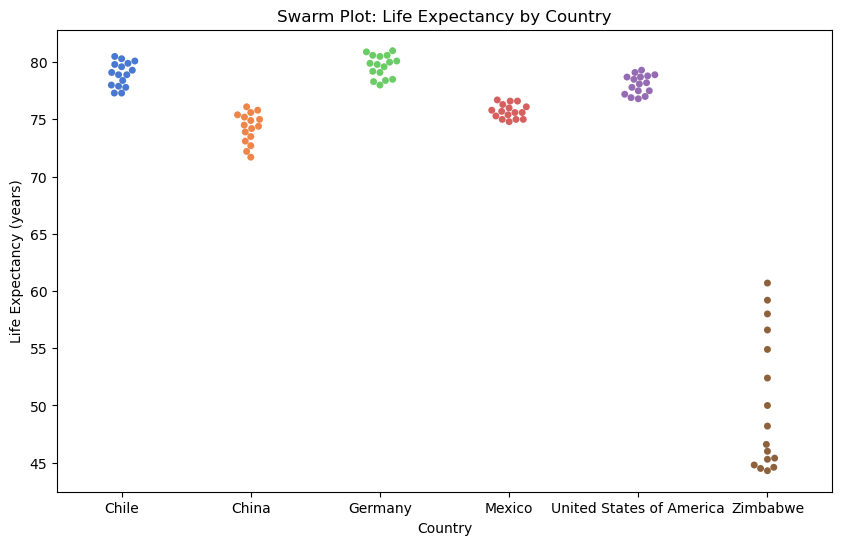

In [40]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=data, x='Country', y='Life expectancy at birth (years)', palette='muted', hue = 'Country', legend=False)
plt.title('Swarm Plot: Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.show()

### Swarm Plot Overlayed on Violin Plot

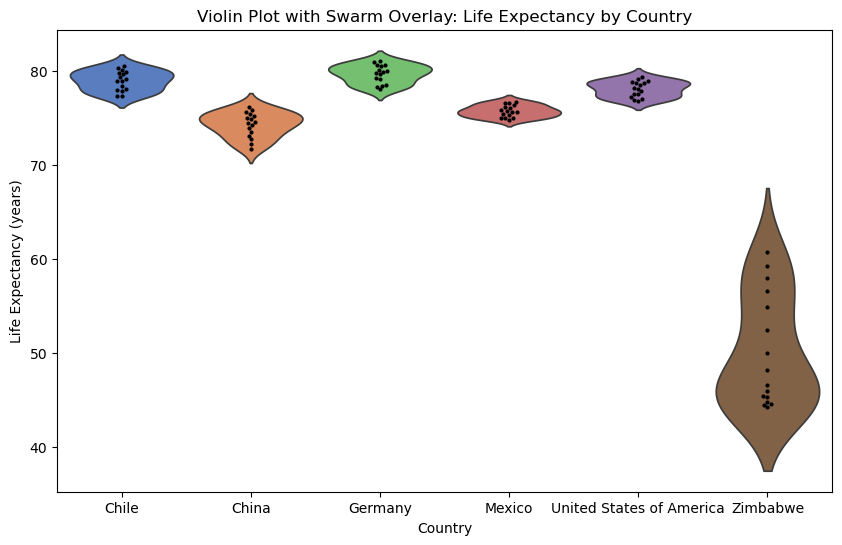

In [42]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='Country', y='Life expectancy at birth (years)', palette='muted', hue = 'Country', legend=False, inner=None)
sns.swarmplot(data=data, x='Country', y='Life expectancy at birth (years)', color='k', size=3)
plt.title('Violin Plot with Swarm Overlay: Life Expectancy by Country')
plt.xlabel('Country')
plt.ylabel('Life Expectancy (years)')
plt.show()

# Important Components

 1. GDP Efficiency (GDP per Year of Life Expectancy)

Calculate GDP efficiency for each country and visualize it.

In [45]:
data['GDP Efficiency'] = data['GDP'] / data['Life expectancy at birth (years)']
gdp_efficiency = data.groupby('Country')['GDP Efficiency'].mean()
print("GDP Efficiency by Country:")
print(gdp_efficiency)

GDP Efficiency by Country:
Country
Chile                       2.139462e+09
China                       6.606530e+10
Germany                     3.876686e+10
Mexico                      1.287938e+10
United States of America    1.800171e+11
Zimbabwe                    1.744957e+08
Name: GDP Efficiency, dtype: float64


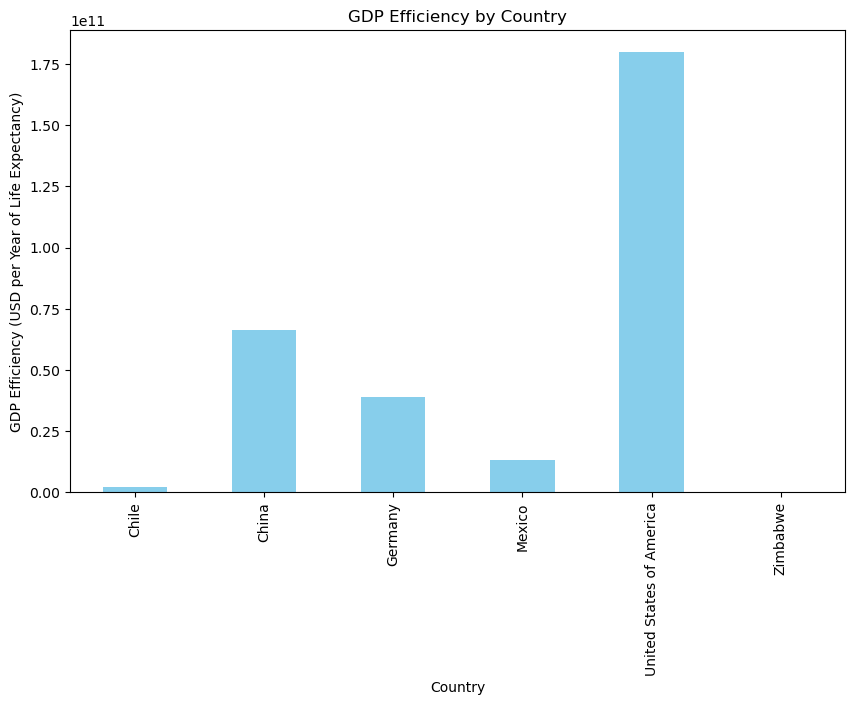

In [46]:
plt.figure(figsize=(10, 6))
gdp_efficiency.plot(kind='bar', color='skyblue')
plt.title('GDP Efficiency by Country')
plt.xlabel('Country')
plt.ylabel('GDP Efficiency (USD per Year of Life Expectancy)')
plt.show()

 2. Ranking Nations by Improvement

Rank countries by improvement in life expectancy and GDP.

In [48]:
data_sorted = data.sort_values(by=['Country', 'Year'])
data_sorted['Life Expectancy Change'] = data_sorted.groupby('Country')['Life expectancy at birth (years)'].diff()
data_sorted['GDP Change'] = data_sorted.groupby('Country')['GDP'].diff()

life_expectancy_growth = data_sorted.groupby('Country')['Life Expectancy Change'].sum()
gdp_growth = data_sorted.groupby('Country')['GDP Change'].sum()

print("Life Expectancy Growth by Country:")
print(life_expectancy_growth)

print("GDP Growth by Country:")
print(gdp_growth)

Life Expectancy Growth by Country:
Country
Chile                        3.2
China                        4.4
Germany                      3.0
Mexico                       1.9
United States of America     2.5
Zimbabwe                    14.7
Name: Life Expectancy Change, dtype: float64
GDP Growth by Country:
Country
Chile                       1.646571e+11
China                       9.853350e+12
Germany                     1.425660e+12
Mexico                      4.686120e+11
United States of America    7.800000e+12
Zimbabwe                    9.614710e+09
Name: GDP Change, dtype: float64


 3. Growth Rates of GDP and Life Expectancy

Calculate and plot the growth rates of GDP and life expectancy for each country.

In [50]:
data_sorted['GDP Growth Rate'] = data_sorted.groupby('Country')['GDP'].pct_change() * 100
data_sorted['Life Expectancy Growth Rate'] = data_sorted.groupby('Country')['Life expectancy at birth (years)'].pct_change() * 100

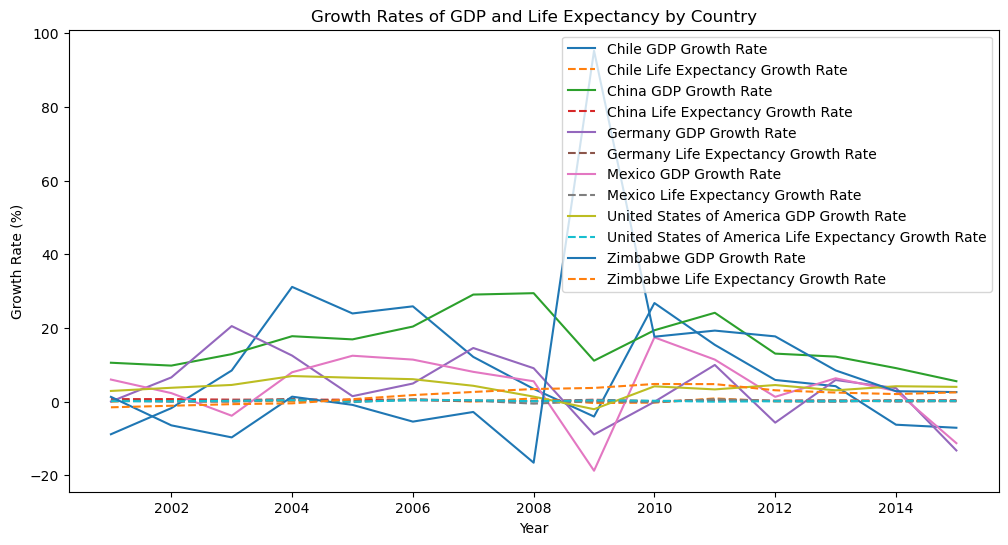

In [51]:
plt.figure(figsize=(12, 6))
for country in data['Country'].unique():
    country_data = data_sorted[data_sorted['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP Growth Rate'], label=f'{country} GDP Growth Rate')
    plt.plot(country_data['Year'], country_data['Life Expectancy Growth Rate'], linestyle='--', label=f'{country} Life Expectancy Growth Rate')
plt.title('Growth Rates of GDP and Life Expectancy by Country')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.show()

# Conclusions

This project was able to make quite a few data visualizations with the data even though there were only 96 rows and 4 columns. 

This analysis explored the relationship between GDP and life expectancy across six nations. Below are the findings for each component:

- Has life expectancy increased over time in the six nations?
    - Yes, life expectancy has increased in all six nations. Notably, Zimbabwe showed the greatest improvement, despite starting with the lowest values.
- Has GDP increased over time in the six nations?
    - GDP has also increased in all six nations. China experienced the most dramatic growth in GDP over the years.
- Is there a correlation between GDP and life expectancy of a country?
    - A positive correlation exists between GDP and life expectancy in all six nations, indicating that higher GDP is associated with longer life expectancy.
- What is the average life expectancy in these nations?
    -Average life expectancy varies by country:
      - Germany and Chile have the highest averages (above 80 years).
      - Zimbabwe has the lowest average (around 50 years).
- What is the distribution of that life expectancy?
    - The distribution of life expectancy is left-skewed, with most observations concentrated in the higher range. Germany and Chile show consistent distributions, while Zimbabwe displays wider variability.

Also, based on important components:
- GDP Efficiency: Germany is the most efficient in converting GDP into life expectancy improvements.
- Rankings: Chile showed the most significant improvement in life expectancy, while China led in GDP growth.
- Growth Trends: Growth rate analysis highlighted periods of economic and health improvements, with occasional slowdowns.


## Further Research 

To address the limitations of this analysis and enhance its scope, the following areas of further research are recommended:

**1. Economic Inequality vs. Life Expectancy**
 - Current analysis uses GDP instead of GDP per capita due to the absence of population data.
 - Acquiring population data for each country would enable calculating GDP per capita and analyzing disparities more effectively.
 - This would provide a more accurate view of economic inequality's impact on life expectancy.
 
 **2. Historical Event Analysis**
 - The analysis lacks annotations for significant global or regional events that may have impacted GDP or life expectancy trends.
 - Further research could involve identifying such events (e.g., financial crises, pandemics) and annotating trends accordingly.
 - This would offer valuable context for anomalies observed in the data and improve the depth of insights.
 
  By addressing these areas, future analyses could provide a more comprehensive understanding of the complex interactions between economic output, inequality, and population health.